## Scratch Implementation

In [1]:
import numpy as np


training_data = np.array([[1.2, 2.8],
                          [2.5, 3.6],
                          [3.1, 4.1],
                          [4.0, 5.0],
                          [5.4, 6.3]])


testing_data = np.array([[1.0, 2.5],
                         [2.0, 3.4],
                         [2.7, 3.9],
                         [3.6, 4.8],
                         [4.5, 5.7]])

In [2]:
x_train , y_train = training_data[:, 0], training_data[:,1]

In [3]:
x_train

array([1.2, 2.5, 3.1, 4. , 5.4])

In [4]:
y_train

array([2.8, 3.6, 4.1, 5. , 6.3])

In [5]:
x_test , y_test = testing_data[:, 0], testing_data[:, 1]

In [6]:
print(x_test,  y_test, sep = '\n')

[1.  2.  2.7 3.6 4.5]
[2.5 3.4 3.9 4.8 5.7]


In [7]:
def linear_regression(x_train, y_train):
    x_mean = np.mean(x_train)
    y_mean = np.mean(y_train)
    slope = (np.sum((x_train - x_mean)*(y_train - y_mean)))/(np.sum((x_train - x_mean)**2))          
    intercept = y_mean - slope * x_mean
    return slope, intercept
    

In [8]:
slope, intercept = linear_regression(x_train, y_train)

In [9]:
print(slope, intercept)

0.8481748896911353 1.6119133574007214


In [10]:
length = len(x_test)

In [11]:
length

5

In [12]:
y_pred = np.zeros(5)

In [13]:
y_pred

array([0., 0., 0., 0., 0.])

In [14]:
y_pred = intercept + slope*x_test

In [15]:
y_pred

array([2.46008825, 3.30826314, 3.90198556, 4.66534296, 5.42870036])

In [16]:
np.concatenate((y_test[:,np.newaxis], y_pred[: , np.newaxis]), axis = 1)

array([[2.5       , 2.46008825],
       [3.4       , 3.30826314],
       [3.9       , 3.90198556],
       [4.8       , 4.66534296],
       [5.7       , 5.42870036]])

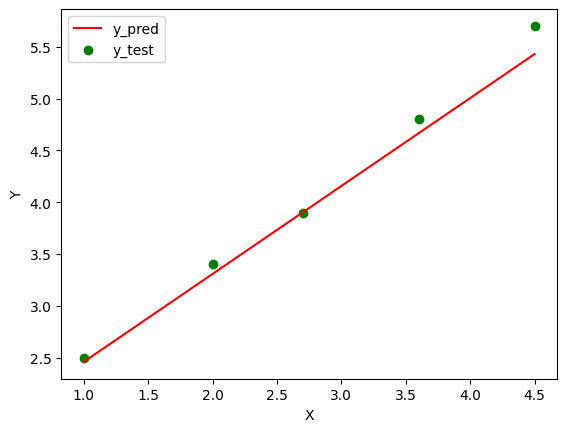

In [17]:
import matplotlib.pyplot as plt
plt.plot(x_test, y_pred, c='r', label = 'y_pred')
plt.scatter(x_test,y_test, c ='g', label = 'y_test')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc = 'upper left')
plt.show()

### Evaluation

In [18]:
r2_score = 1 - np.sum((y_pred-y_test)**2)/np.sum((y_pred-np.mean(y_test))**2)

In [19]:
r2_score

0.981121229427957

In [20]:
adjusted_r2 = 1 - (1-r2_score)*(len(y_test)- 1)/(len(y_test) -1 - x_test.ndim)

In [21]:
adjusted_r2

0.9748283059039426

## Using Library

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regressor = LinearRegression()

In [24]:
x_train.shape

(5,)

In [25]:
regressor.fit(x_train.reshape(-1, 1), y_train)

LinearRegression()

In [26]:
regressor.intercept_

1.6119133574007218

In [27]:
regressor.coef_

array([0.84817489])

In [28]:
y_pred2 = regressor.predict(x_test.reshape(-1,1))

In [29]:
y_pred2

array([2.46008825, 3.30826314, 3.90198556, 4.66534296, 5.42870036])

In [30]:
np.concatenate((y_test.reshape(-1,1), y_pred.reshape(-1,1)), axis = 1)

array([[2.5       , 2.46008825],
       [3.4       , 3.30826314],
       [3.9       , 3.90198556],
       [4.8       , 4.66534296],
       [5.7       , 5.42870036]])

In [31]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred2))


0.9834069545010885


## Large dataset

In [ ]:
import os
os.listdir('/kaggle/input/')

In [32]:
import pandas as pd
dataset = pd.read_csv('/kaggle/input/house/Housing.csv')

In [33]:

dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
505,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
506,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
507,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0


In [34]:
#since its a linear regression , lets take only onne column for demonstration

In [35]:
x, y = dataset[ 'RM'], dataset[ 'MEDV']

In [36]:
x

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
504    6.593
505    6.120
506    6.976
507    6.794
508    6.030
Name: RM, Length: 509, dtype: float64

In [37]:
x.shape

(509,)

In [38]:
type(x)

pandas.core.series.Series

In [39]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x, y)

In [40]:
x_train.shape

(381,)

In [41]:
x_test.shape

(128,)

In [42]:
x.shape

(509,)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
regressor2 = LinearRegression()

In [45]:
x_train_np = x_train.to_numpy()
x_test_np = x_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

In [46]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, sep = '\n')

(381,)
(381,)
(128,)
(128,)


In [47]:
type(x_train_np)

numpy.ndarray

In [48]:
regressor2.fit(x_train_np.reshape(-1,1), y_train_np)

LinearRegression()

In [49]:
y_pred3 = regressor.predict(x_test_np.reshape(-1,1))

In [50]:
np.concatenate((y_pred3[:, np.newaxis], y_test_np[:, np.newaxis]), axis = 1)

array([[ 6.36084456, 13.9       ],
       [ 6.30740955, 11.3       ],
       [ 6.57712916, 10.8       ],
       [ 6.87738307, 11.7       ],
       [ 6.94354071, 21.4       ],
       [ 6.96559326, 21.2       ],
       [ 7.88247032, 17.8       ],
       [ 7.23955375, 24.5       ],
       [ 6.45329563, 18.5       ],
       [ 6.68654372, 13.6       ],
       [ 6.82988528,  8.7       ],
       [ 7.02581368, 24.7       ],
       [ 6.70859627, 18.9       ],
       [ 6.60851163, 22.6       ],
       [ 6.79256558, 21.9       ],
       [ 7.52878139, 23.9       ],
       [ 6.78238748, 13.5       ],
       [ 7.6636412 , 32.9       ],
       [ 7.55507481, 23.6       ],
       [ 7.39307341, 31.6       ],
       [ 6.65855395, 13.2       ],
       [ 8.33709206, 50.        ],
       [ 7.0453217 , 17.1       ],
       [ 6.56016566, 19.9       ],
       [ 7.52199599, 10.4       ],
       [ 6.20393221,  7.        ],
       [ 7.24549097, 28.7       ],
       [ 7.37950261, 31.1       ],
       [ 6.59494083,

## Using Normal Equation

In [51]:
import numpy as np
X = 3 *np.random.rand(100, 1)
Y = 5 + 4*X + 2*np.random.randn(100,1)

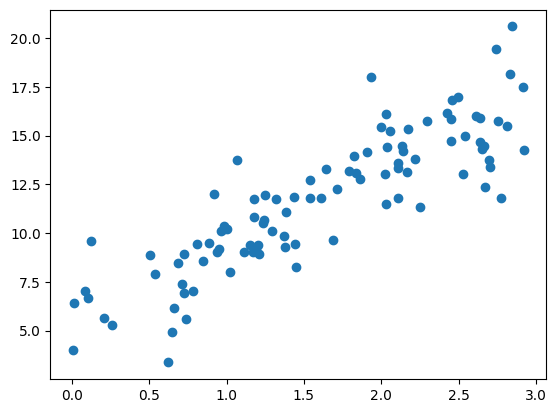

In [52]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.show()

In [53]:
print(X.shape)
print(Y.shape)

(100, 1)
(100, 1)


In [54]:
X_up = np.c_[np.ones((100,1)),X]

In [55]:
X_up[:10, :]

array([[1.        , 2.1652738 ],
       [1.        , 2.17275594],
       [1.        , 2.83266002],
       [1.        , 0.98238239],
       [1.        , 2.53181054],
       [1.        , 2.6978686 ],
       [1.        , 0.50357895],
       [1.        , 0.0075163 ],
       [1.        , 1.24807026],
       [1.        , 1.82125068]])

In [56]:
X_up.shape

(100, 2)

In [57]:
best_theta = np.linalg.inv(X_up.T.dot(X_up)).dot(X_up.T).dot(Y)

In [58]:
best_theta

array([[5.57165134],
       [3.8259016 ]])

In [59]:
bias = best_theta[0]
weight = best_theta[1]

In [60]:
y_pred_function = bias + weight*X

In [61]:
y_pred_function[:10, :]

array([[13.85577583],
       [13.88440176],
       [16.40912985],
       [ 9.33014971],
       [15.25810934],
       [15.89343114],
       [ 7.49829484],
       [ 5.60040795],
       [10.34664533],
       [12.53957722]])

In [62]:
np.concatenate((y_pred_function, Y), axis = 1)[:10, :]

array([[13.85577583, 13.13944663],
       [13.88440176, 15.31055734],
       [16.40912985, 18.15884689],
       [ 9.33014971, 10.34852734],
       [15.25810934, 13.01338756],
       [15.89343114, 13.72309444],
       [ 7.49829484,  8.89346488],
       [ 5.60040795,  3.9932338 ],
       [10.34664533, 11.97235588],
       [12.53957722, 13.95611904]])

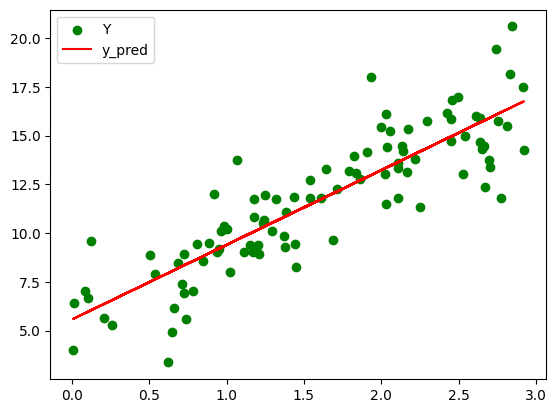

In [63]:
plt.scatter(X, Y, c = 'g', label ="Y" )
plt.plot(X, y_pred_function, c= 'red', label = "y_pred")
plt.legend(loc = 'upper left')
plt.show()

In [64]:
from sklearn.linear_model import LinearRegression
regressor.fit(X, Y)


LinearRegression()

In [65]:
print(bias, regressor.intercept_)

[5.57165134] [5.57165134]


In [66]:
print(weight, regressor.coef_)

[3.8259016] [[3.8259016]]


## Using Least Square Fucntion

In [67]:
import math
theta_best2,residuals, rank, A = np.linalg.lstsq(X_up, Y, rcond = -1)

In [68]:
X.shape

(100, 1)

In [69]:
theta_best2

array([[5.57165134],
       [3.8259016 ]])

## Using Gradient Descent

[[5.57165134]
 [3.8259016 ]]


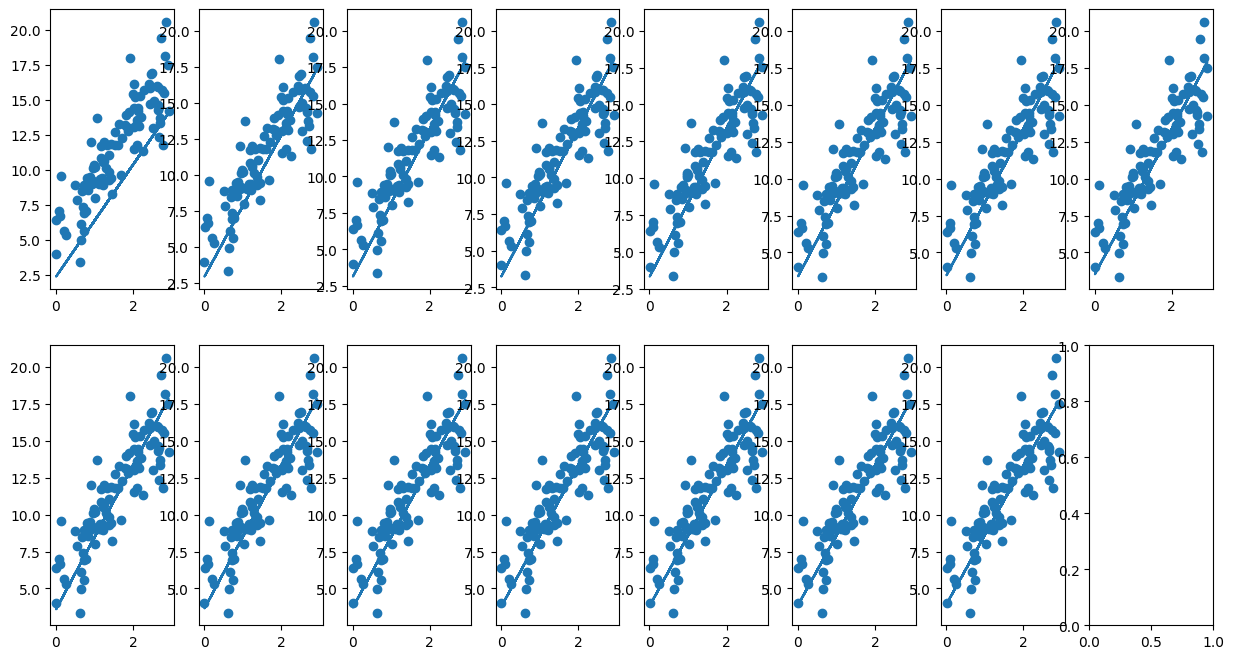

In [72]:
eta = 0.1
iterations = 1000
theta = np.random.randn(2, 1)
m = len(X_up)
fig , ax = plt.subplots(2, 8, figsize = (15, 8))
count_x = 0
count_y = 0
for i in range(iterations):
    gen = (2/m ) * (X_up.T).dot(X_up.dot(theta) - Y)
    theta = theta - eta *gen
    y_pred = theta[0] + X.dot(theta[1])
    if i <15 and i>=0:
        if count_y == 8:
            count_x +=1
            count_y = 0
        ax[count_x, count_y].scatter(X, Y)
        ax[count_x,count_y].plot(X, y_pred)
        count_y +=1   
print(theta)

/tmp/ipykernel_73/1921493412.py:10: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta *gen


[[nan]
 [nan]]


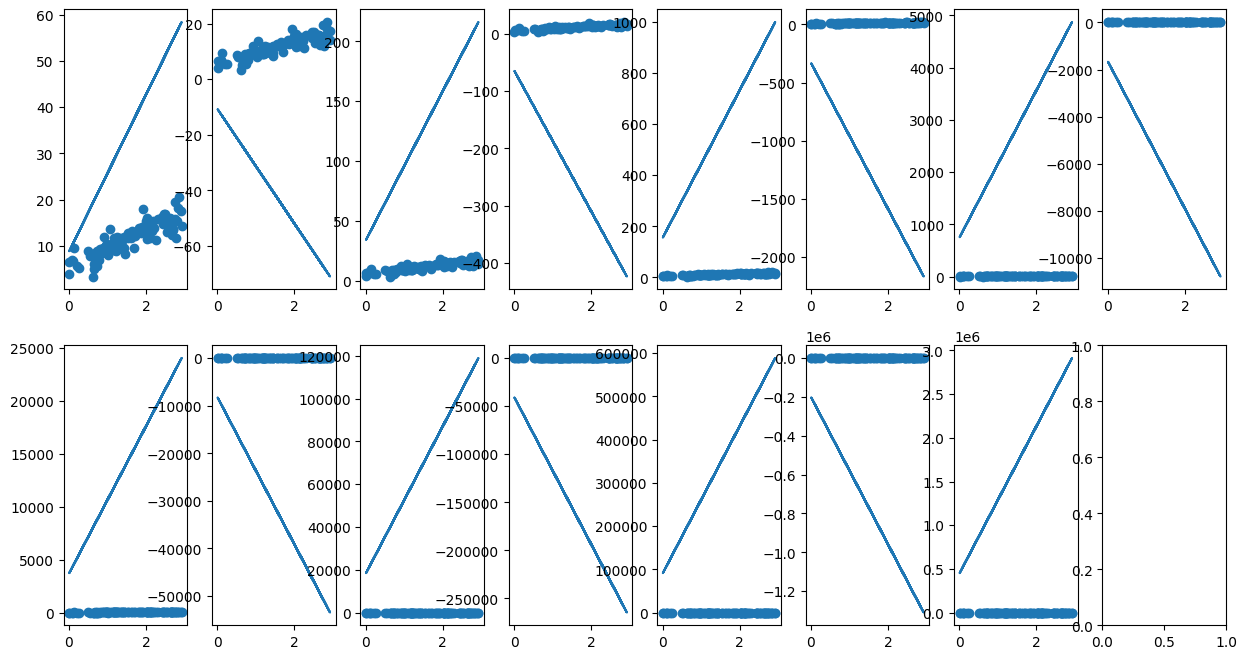

In [73]:
eta = 0.4
iterations = 1000
theta = np.random.randn(2, 1)
m = len(X_up)
fig , ax = plt.subplots(2, 8, figsize = (15, 8))
count_x = 0
count_y = 0
for i in range(iterations):
    gen = (2/m ) * (X_up.T).dot(X_up.dot(theta) - Y)
    theta = theta - eta *gen
    y_pred = theta[0] + X.dot(theta[1])
    if i <15 and i>=0:
        if count_y == 8:
            count_x +=1
            count_y = 0
        ax[count_x, count_y].scatter(X, Y)
        ax[count_x,count_y].plot(X, y_pred)
        count_y +=1   
print(theta)

[[5.56801629]
 [3.827817  ]]


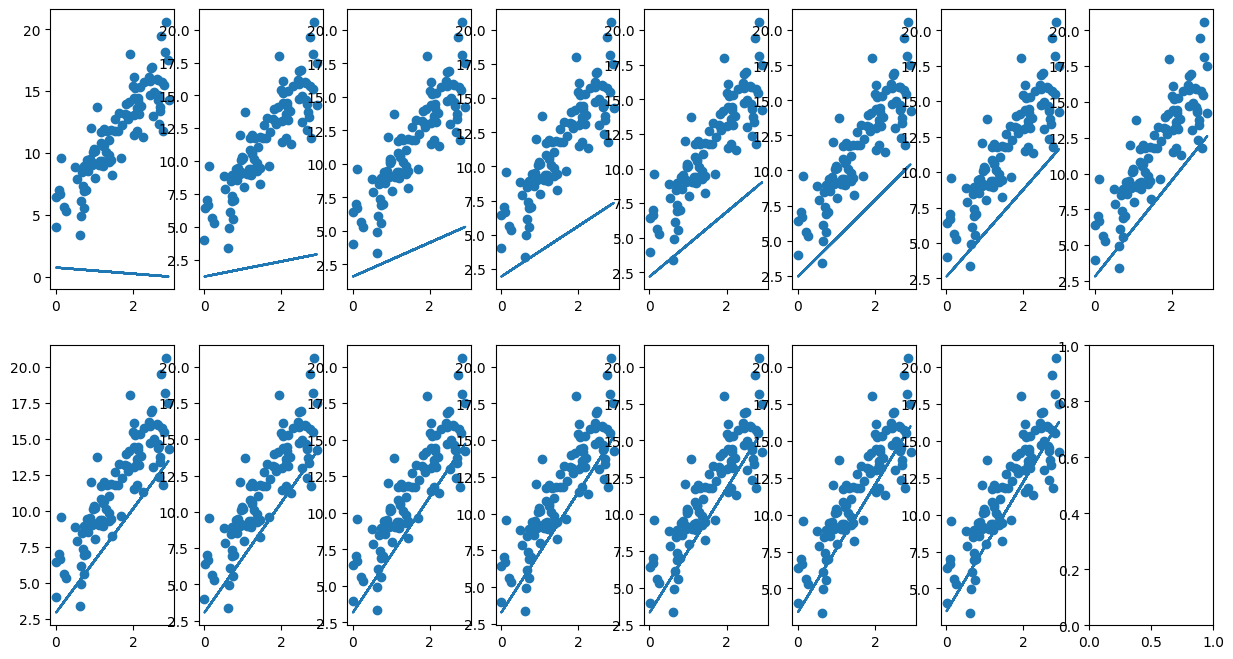

In [74]:
eta = 0.02
iterations = 1000
theta = np.random.randn(2, 1)
m = len(X_up)
fig , ax = plt.subplots(2, 8, figsize = (15, 8))
count_x = 0
count_y = 0
for i in range(iterations):
    gen = (2/m ) * (X_up.T).dot(X_up.dot(theta) - Y)
    theta = theta - eta *gen
    y_pred = theta[0] + X.dot(theta[1])
    if i <15 and i>=0:
        if count_y == 8:
            count_x +=1
            count_y = 0
        ax[count_x, count_y].scatter(X, Y)
        ax[count_x,count_y].plot(X, y_pred)
        count_y +=1   
print(theta)

In [75]:
y_pred = theta[0] + theta[1]*X

In [76]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, Y)**0.5

In [77]:
rmse

1.7507187086033311

## Using stochastic Descent

In [127]:
t0 ,t1 = 5, 50
def learning_rate_modify(t):
    return t0/(t+ t1)
    

[[0.1020993 ]
 [0.78146017]]


array([[5.57423309],
       [3.86527415]])

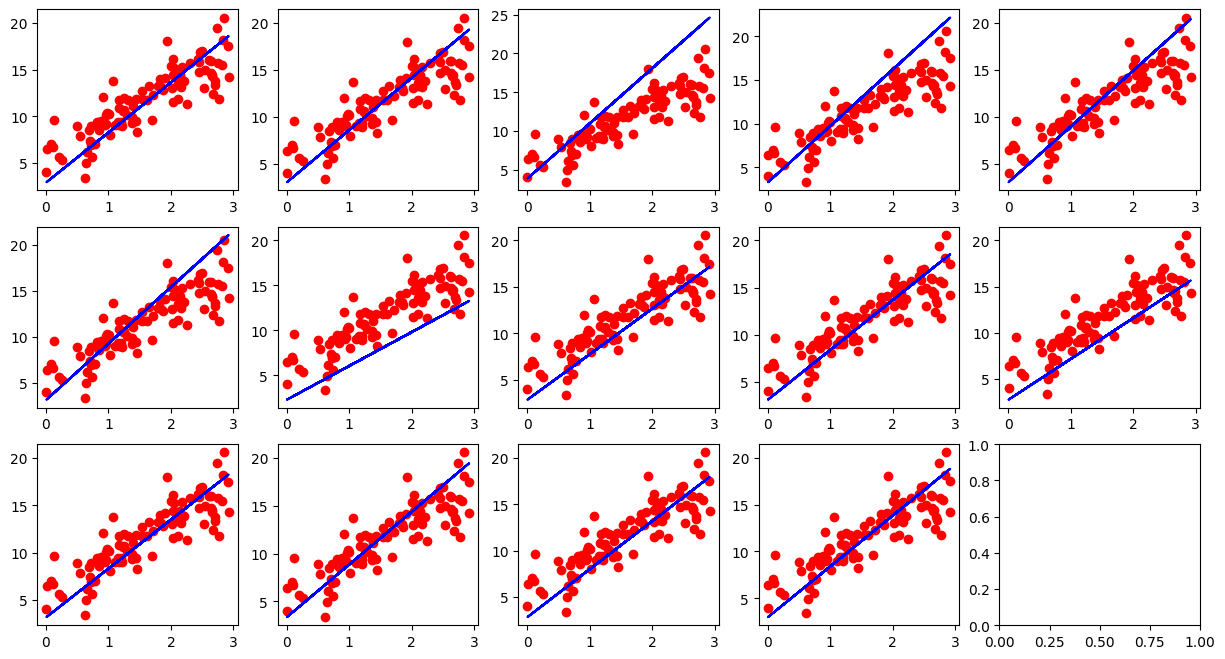

In [142]:
epochs = 50
m = len(X_up)
theta = np.random.randn(2,1)
print(theta)
fig, ax = plt.subplots(3, 5, figsize = (15,8))
count_x = 0
count_y = 0
counter = 0
for epoch in range(epochs):
    for i in range(m):
        counter +=1
        ind = np.random.randint(m )
        xi = X_up[ind:ind+1 ]
        yi = Y[ind:ind+1]
        gen = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_rate_modify(epoch*m + i)
        theta = theta - eta*gen
        if counter > 1 and counter<16:
            y_pred = theta[0] + theta[1] * X
            if count_y== 5 and count_x == 0:
                count_x = 1
                count_y=0
            elif count_y == 5 and count_x == 1:
                count_x = 2
                count_y = 0
            ax[count_x, count_y].scatter(X, Y, c = 'r', label = 'true')
            ax[count_x, count_y].plot(X, y_pred, c = 'b', label = 'pred')
            count_y +=1
        
theta
    

## Scikit SGD

In [147]:
from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor(max_iter= 100, tol = 0.002, penalty = None,eta0=0.1)

In [156]:
sgd_regressor.fit(X, Y.ravel())

SGDRegressor(eta0=0.1, max_iter=100, penalty=None, tol=0.002)

In [158]:
sgd_regressor.coef_

array([3.71716215])

In [159]:
sgd_regressor.intercept_

array([5.46725842])

## Using mini batch

In [ ]:
[[1.         2.1652738 ]
 [1.         2.61321889]].dot([[1.         2.1652738 ]
 [1.         2.61321889]].dot([[1, 2]]) - [13.13944663 15.98555171] )

In [185]:
y_b.shape

(20,)

In [186]:
x_b.shape

(20, 2)

In [184]:
Y[2:5].shape

(3, 1)

In [189]:
epochs = 50
m = len(X_up)
batch_size = m//5
theta = np.random.randn(2,1)
print(theta)
XY = np.concatenate((X_up, Y), axis = 1)
for epoch in range(epochs):
    for i in range(10):
        rng = np.random.default_rng()
        randomm = rng.choice(XY, batch_size)
        x_b, y_b  = randomm[:, :2], randomm[:, -1] 
        gen = (2/(batch_size)) * x_b.T.dot(x_b.dot(theta) - y_b.reshape(batch_size, 1))
        eta = learning_rate_modify(epoch*5+ i)
        theta = theta - eta*gen
        
theta

[[-0.21599067]
 [-1.74296429]]


array([[5.63974329],
       [3.83398527]])